# Problema 1

Putem avea succes sau insucces (1 -p) => distributia bernoulli
1. Dreapa succes cu prob p si Stanga  insucces cu prob 1-p


In [1]:
from scipy.stats import bernoulli

help('scipy.stats.bernoulli')

Help on bernoulli_gen in scipy.stats:

scipy.stats.bernoulli = <scipy.stats._discrete_distns.bernoulli_gen object>
    A Bernoulli discrete random variable.

    As an instance of the `rv_discrete` class, `bernoulli` object inherits from it
    a collection of generic methods (see below for the full list),
    and completes them with details specific for this particular distribution.

    Methods
    -------
    rvs(p, loc=0, size=1, random_state=None)
        Random variates.
    pmf(k, p, loc=0)
        Probability mass function.
    logpmf(k, p, loc=0)
        Log of the probability mass function.
    cdf(k, p, loc=0)
        Cumulative distribution function.
    logcdf(k, p, loc=0)
        Log of the cumulative distribution function.
    sf(k, p, loc=0)
        Survival function  (also defined as ``1 - cdf``, but `sf` is sometimes more accurate).
    logsf(k, p, loc=0)
        Log of the survival function.
    ppf(q, p, loc=0)
        Percent point function (inverse of ``cdf`` --- 

In [15]:
p = 0.5

def simulare_drum_liniar(n):
    moves = bernoulli.rvs(p, size=n)
    position = 0
    positions = [0]
    for x in moves:
        if x:
            position += 1
        else:
            position -= 1
        positions.append(position)
    return positions,position

print(simulare_drum_liniar(100))


([0, 1, 2, 3, 4, 3, 4, 5, 4, 5, 4, 3, 4, 5, 6, 5, 4, 5, 6, 5, 4, 5, 4, 5, 4, 3, 4, 5, 4, 5, 4, 5, 6, 5, 6, 7, 8, 7, 8, 9, 8, 9, 8, 7, 8, 9, 10, 9, 10, 9, 10, 11, 10, 9, 10, 9, 8, 9, 8, 9, 10, 11, 12, 13, 14, 15, 14, 15, 16, 17, 18, 19, 20, 19, 20, 21, 20, 19, 20, 19, 18, 17, 16, 15, 16, 15, 16, 17, 18, 19, 18, 19, 20, 21, 22, 23, 22, 21, 22, 21, 22], 22)


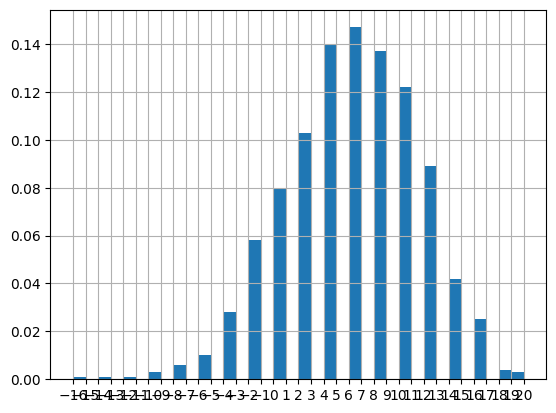

In [34]:
from matplotlib import pyplot as plt

N = 1000

positions = [simulare_drum_liniar(30)[1] for _ in range(N)]
bins = [i for i in range(min(positions), max(positions)+1)]
plt.hist(positions,bins=bins,density=True)
plt.xticks(bins)
plt.grid()
plt.show()


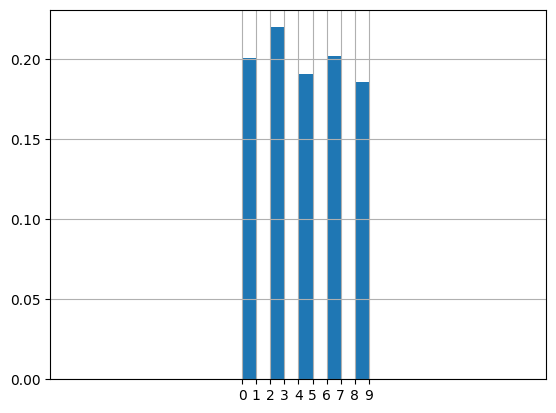

In [33]:
NR_NODURI = 10

def simulare_drum_cerc(n):
    moves = bernoulli.rvs(p, size=n)
    position = 0
    positions = [0]
    for x in moves:
        if x:
            position = (position+1)%NR_NODURI
        else:
            position = (position-1)%NR_NODURI
        positions.append(position)
    return positions,position

positions_cerc = [simulare_drum_cerc(30)[1] for _ in range(N)]
plt.hist(positions_cerc,bins=bins,density=True)
plt.xticks(range(NR_NODURI))
plt.grid()
plt.show()

# Problema 2

distribuita hipergeometrica = masoara numarul de esecuri pana la primul succes

In [38]:
from scipy.stats import hypergeom, geom

M, n, N = 49, 6, 6

p_succes = hypergeom.sf(2, M, n, N)
print(f"Probabilitatea unui bilet câștigător: {p_succes:.5f}")

n_simulari = 1000
lista_incercari = geom.rvs(p_succes, size=n_simulari)
print(lista_incercari)

lista_esecuri = [x - 1 for x in lista_incercari]

print("Numărul de bilete ratate până la primul câștig (primele 20 simulări):")
print(lista_esecuri[:20])

succese_eveniment = sum(1 for esecuri in lista_esecuri if esecuri >= 10)
prob_estimata = succese_eveniment / len(lista_esecuri)

print(f"Probabilitatea estimată (simulare): {prob_estimata:.4f}")
print(f"Probabilitatea teoretică: {geom.sf(10,p_succes):.4f}")

Probabilitatea unui bilet câștigător: 0.01864
[ 22  13  63  69  56   8 119  12  29  80  37  83   5  25  11   5  15  40
  96  42  27 108  94  38   2 126  18   7  44  55  50  76  49  55  72  67
  12  60  94  26   6   3  59  37  25   4  12  32  18 206  55  44  72   1
   8  54  37 228 136  39 140 270  21  29  33  27  17  62  37   5  25   8
 299  42 101  49  22  55  52  16 105  48 110  32   3  71 124  12   8 117
  24 193   5  34  59   3 136  24   5  28   3  61 110  31  14 105  64   2
  32  92  31  26  68 164 164  19  80  20  79  74 110  95  25   9  35  22
  57  26  28  46  75 103  24 104  30  23  49 191  35  10   1  23  49  47
   2 139  35  60   6   4  11  25  17  80  19  31 126  30  15  96 107  92
  34  95  65  60  66  43  18  17   1  32 250 105  17  16  27  52  28  21
 111  27  27 148  52  38   8  75  51  95  29  69 164  31  97  92 103  12
  17   5  17  31 100  80 148  69  12   9  78  76  25  51  15  15  39   6
  86   9  59  21   4   3   8  39  16  29  64   9  64   8 196  76  37  15
  20 